<div style="border:2px solid black; padding:10px">
    
# <font color="blue">Objective: </font>Provide an Introduction to the Linear Regression Normal Equation
</div>

# Import Dependencies

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Linear regression
from sklearn.linear_model import LinearRegression

<hr style="border-top: 2px solid black;">

# Import Data

 - Better Life Index data from the Organisation for Economic Co-operation and Development (OECD) website
 - Website: https://stats.oecd.org/index.aspx?DataSetCode=BLI
 - Gross domestic product (GDP) per capita in 2015 from the International Monetary Fund
 - Website: https://homl.info/5

In [2]:
better_life_index_file ="bli_oecd.csv"
# Only import necessary columns from bli dataset
bli_df = pd.read_csv(better_life_index_file, usecols=['LOCATION', 'Country', 'Indicator', 'Inequality', 'Value'])
gdp_file = 'gdp_data.csv'
dfp_df = pd.read_csv(gdp_file)

<hr style="border-top: 2px solid black;">

# Inspect Dataframes

In [3]:
print('The shape for the {} dataframes is: {}'.format('Better Life Index', bli_df.shape))
print('The shape for the {} dataframes is: {}'.format('GDP', dfp_df.shape))

The shape for the Better Life Index dataframes is: (2369, 5)
The shape for the GDP dataframes is: (189, 2)


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
There are more countries listed in the BLI dataframe thant here are in the gdp country dataframe
</div>

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
 - Only care about Indicator = "Life satisfaction" and Inequality = "Total"
 - Will filter for those conditions
</div>

In [4]:
# Update dataframe
bli_df = bli_df[bli_df.Indicator.str.contains('Life satisfaction') & bli_df.Inequality.str.contains('Total')]

In [5]:
# Inspect data
print('''The number of unique values in the Indicator column is {}, \nand the number of unique values in the Inequality column is {} 
      '''.format(len(bli_df.Indicator.unique()), len(bli_df.Inequality.unique())))

The number of unique values in the Indicator column is 1, 
and the number of unique values in the Inequality column is 1 
      


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
Successfully filtered BLI data.
</div>

# Merge Dataframes using <code>Dataframe.merge()</code>
 - Documentation as of 5/16/20: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [6]:
df = bli_df.merge(dfp_df, how="left", on="Country")

In [7]:
# Clean data, drop uncessary columns
not_needed = ['Indicator', 'Inequality']
# Drop columns that are not necessary
df.drop(not_needed, axis=1, inplace=True)
# Drop row with missing value
df.dropna(inplace=True)

<hr style="border-top: 2px solid black;">

# Visualize the Data

### Prepare Data for plotting and linear regression

 - np.c_ method translates slice objects to concatenation along the second axis.
 - Stack 1-D arrays as columns into a 2-D array.
 - Documentation as of 5/16/20: https://numpy.org/devdocs/reference/generated/numpy.c_.html
 - This is important for matrix calculations

In [ ]:
# Translates slice objects to concatenation along the second axis.
# Data for plotting
X = np.c_[df["GDP"]]
y = np.c_[df["Value"]]
labels = df.Country
# To mark US datapoint
us_data = df[df.Country == 'United States']

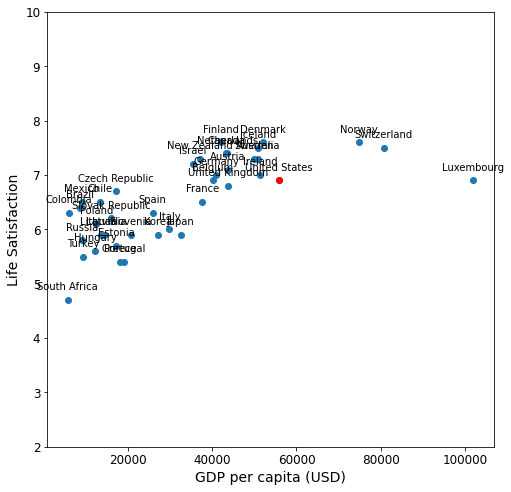

In [14]:
fig, axes = plt.subplots(1,1, figsize=(8,8))
axes.set_xlabel('GDP per capita (USD)', fontsize = 14)
axes.set_ylabel('Life Satisfaction', fontsize = 14)
axes.set_ylim(2, 10)
plt.scatter(X, y, axes=axes)
plt.scatter(us_data.GDP, us_data.Value, color='red', axes=axes)

# zip joins x and y coordinates in pairs
for xs, ys, label in zip(X,y,labels):
    
    plt.annotate(label, # this is the text
                 (xs,ys), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
There seems to be a trend, as GPD increases, so does the life satisfaction score.<br>
The US is in red.<br>
</div>

<hr style="border-top: 5px solid red;">

# Linear regression using the Normal Equation

 - Linear Regression Modeling using Cost Function
 - Cost function measures the distance between the linear model's prediction and the training examples.
 - It measures how bad the model is at predicting.
 - The linear model finds the best parameters that make the model fit best to the data.
 - Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. 

# Normal Equation $\hat{\theta}$ = ($X^TX$)$^-$$^1$ $X^T$ y

 - $\hat{\theta}$ is the value of the $\theta$ parameter that minimizes the cost function
 - y is the vector of the target we are to predict

# Calcuate the the theta_best $\hat{\theta}$ in two steps

 - Step 1: <code>X_b = np.c_[np.ones((len(X), 1)), X]</code>
 - Step 2: <code>theta_best = inv_matrix.dot(X_b.T).dot(y)</code>

In [64]:
# add x0 = 1 to each instance, there are 41 instances
X_b = np.c_[np.ones((40, 1)), X]
theta_best = inv_matrix.dot(X_b.T).dot(y)

In [65]:
# The theta_best is the $\hat{\theta}$
theta_best

array([[5.72408174e+00],
       [2.46904428e-05]])

# Extract the Intercept and the Regression Coefficient from <code>theta_best</code> $\hat{\theta}$

In [66]:
intercept, line_coef = theta_best[0], theta_best[1]

In [68]:
print('The intercept for the normal equation is {}, \nand the coefficient is: {} '.format(intercept, line_coef))

The intercept for the normal equation is [5.72408174], 
and the coefficient is: [2.46904428e-05] 


<hr style="border-top: 2px solid black;">

# Make a prediction using the optimal parameter <strong>$\hat{\theta}$</strong>

In [31]:
# The life satistication for Cyprus using GDP per capita
X_new = [[22587]]
X_new

[[22587]]

In [32]:
# Matrix prepration
X_new_b = np.c_[np.ones(1), X_new]
X_new_b

array([[1.0000e+00, 2.2587e+04]])

In [33]:
# Use matrix multiplication to obtain predicted life satisfaction score
y_predict = X_new_b.dot(theta_best)
y_predict

array([[6.28176477]])

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
 - Cyprus had a GPD per captia of $22,587 in 2015
 - The predicted life satisfaction value is 6.28

</div>

<hr style="border-top: 2px solid black;">

# Plot prediction

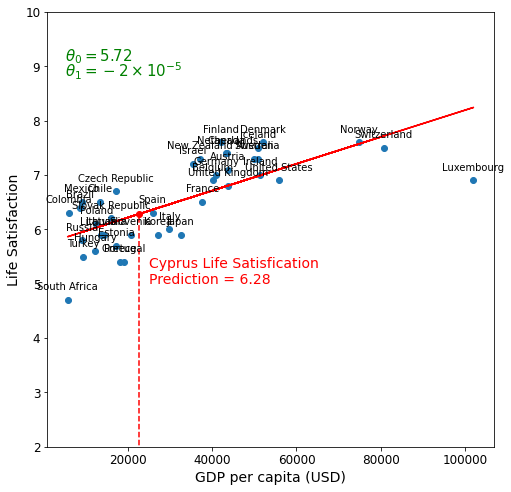

In [63]:
fig, axes = plt.subplots(1,1, figsize=(8,8))
axes.set_xlabel('GDP per capita (USD)', fontsize = 14)
axes.set_ylabel('Life Satisfaction', fontsize = 14)
axes.set_ylim(2, 10)

# Plot the data
plt.scatter(X, y, axes=axes)

# Plot the linear regression line
plt.plot(X, theta_best[0] + theta_best[1]*X, "r")
plt.text(5000, 9.1, r"$\theta_0 = 5.72$", fontsize=15, color="g")
plt.text(5000, 8.8, r"$\theta_1 = -2 \times 10^{-5}$", fontsize=15, color="g")

# Plot the predicted point for Cyprus
plt.scatter(X_new, y_predict, color='red', axes=axes)
plt.text(25000, 5.0, "Cyprus Life Satisfication \nPrediction = 6.28", fontsize=14, color="r")
# Vertical line to help pin point prediction
plt.plot([X_new[0], X_new[0]], [0, y_predict[0]], "r--")

# Add the labels of each country
for xs, ys, label in zip(X,y,labels):
    plt.annotate(label, # this is the text
                 (xs,ys), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
- Here we see that as GPD per capita increases, so does the Life Satisfaction Score.

</div>

<hr style="border-top: 5px solid red;">

# Breaking Down The Normal Equation

 - Step 1: Create a 2D Array  <code>X_b</code> from <code>X</code>
  - <code>X_b</code> will containing two values per instance <code>1, and GDP per country</code>
 - Step 2: Create a new Matrix <code>X_b_transposed</code>
  - <code>X_b_transposed</code> is the Transposed Matrix of <code>X_b</code>
 - Step 3: Create a new Matrix <code>mm</code>
  - mm is obtained by multiplying <code>X_b_transposed</code> by <code>X_b</code>
 - Step 4: Create a new Matrix <code>inv_matrix</code>
  - This matrix is the inverse of the <code>mm</code> matrix
 - Step 5: Calculte the optimal parameter Theta_best $\hat{\theta}$
  - theta_best = <code>inv_matrix.dot(X_b.T).dot(y)</code>

# Reminder: the <CODE>X</CODE> is a stacked array with the GDP per capita for each country

 - This is our 'independent variable'

In [74]:
X

array([[ 50961.87],
       [ 43724.03],
       [ 40106.63],
       [ 43331.96],
       [ 17256.92],
       [ 52114.17],
       [ 41973.99],
       [ 37675.01],
       [ 40996.51],
       [ 18064.29],
       [ 12239.89],
       [ 50854.58],
       [ 51350.74],
       [ 29866.58],
       [ 32485.55],
       [ 27195.2 ],
       [101994.09],
       [  9009.28],
       [ 43603.12],
       [ 37044.89],
       [ 74822.11],
       [ 12495.33],
       [ 19121.59],
       [ 15991.74],
       [ 25864.72],
       [ 49866.27],
       [ 80675.31],
       [  9437.37],
       [ 43770.69],
       [ 55805.2 ],
       [  8670.  ],
       [ 13340.91],
       [ 17288.08],
       [ 35343.34],
       [ 13618.57],
       [  9054.91],
       [ 20732.48],
       [  5694.57],
       [  6083.51],
       [ 14210.28]])

In [79]:
X.shape

(40, 1)

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
 - 40 is the number of GDPs 
 - 1 is the number of 'columns' in this X array

</div>

# Step 1: Create a 2D Array <code>X_b</code> that contains  <code>1</code> and  <code>X</code> per instance. The X contains the GDP per country

Use numpy's np.c_ and np.ones()
 - np.c_ : Translates slice objects to concatenation along the second axis.
 - Documentation as of 5/15/20:
  - https://numpy.org/devdocs/reference/generated/numpy.c_.html
 - np.ones(): Return a new array of given shape and type, filled with ones.
 - Documentation as of 5/15/20:
  - https://numpy.org/devdocs/reference/generated/numpy.ones.html

In [77]:
# add x0 = 1 to each instance, 
# and then it also adds the GPD from the X array
# np.c_ creates the stacked 2d array out of those values
X_b = np.c_[np.ones((40, 1)), X]
X_b

array([[1.0000000e+00, 5.0961870e+04],
       [1.0000000e+00, 4.3724030e+04],
       [1.0000000e+00, 4.0106630e+04],
       [1.0000000e+00, 4.3331960e+04],
       [1.0000000e+00, 1.7256920e+04],
       [1.0000000e+00, 5.2114170e+04],
       [1.0000000e+00, 4.1973990e+04],
       [1.0000000e+00, 3.7675010e+04],
       [1.0000000e+00, 4.0996510e+04],
       [1.0000000e+00, 1.8064290e+04],
       [1.0000000e+00, 1.2239890e+04],
       [1.0000000e+00, 5.0854580e+04],
       [1.0000000e+00, 5.1350740e+04],
       [1.0000000e+00, 2.9866580e+04],
       [1.0000000e+00, 3.2485550e+04],
       [1.0000000e+00, 2.7195200e+04],
       [1.0000000e+00, 1.0199409e+05],
       [1.0000000e+00, 9.0092800e+03],
       [1.0000000e+00, 4.3603120e+04],
       [1.0000000e+00, 3.7044890e+04],
       [1.0000000e+00, 7.4822110e+04],
       [1.0000000e+00, 1.2495330e+04],
       [1.0000000e+00, 1.9121590e+04],
       [1.0000000e+00, 1.5991740e+04],
       [1.0000000e+00, 2.5864720e+04],
       [1.0000000e+00, 4.

In [78]:
X_b.shape

(40, 2)

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
 - 40 is the number of GDPs, this did not change
 - 2 is the number of 'columns' in this X_b 2d array, the 1st column is the 1 we added used np.ones(), and the other value is the GDP

</div>

<hr style="border-top: 2px solid black;">

# Step 2: Create a new Matrix <code>X_b_transposed</code> by transposing <code>X_b</code>

## Matrix transpose using numpy .T attribute.

 - Documentation as of 5/15/20: https://numpy.org/devdocs/reference/generated/numpy.ndarray.T.html
 
## Matrix transpose Example
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ Xb^T =
\begin{bmatrix}
  1 & 5.09 \\
  1 & 4.37 
\end{bmatrix}^T =
\begin{bmatrix}
  1 & 1 \\
  5.09 & 4.37
\end{bmatrix}$

In [82]:
X_b_transposed = X_b.T

### Inspect transposition

In [93]:
X_b_transposed

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [5.0961870e+04, 4.3724030e+04, 4.0106630e+04, 4.3331960e+04,
        1.7256920e+04, 5.2114170e+04, 4.1973990e+04, 3.7675010e+04,
        4.0996510e+04, 1.8064290e+04, 1.2239890e+04, 5.0854580e+04,
        5.1350740e+04, 2.9866580e+04, 3.2485550e+04, 2.7195200e+04,
        1.0199409e+05, 9.0092800e+03, 4.3603120

In [94]:
X_b_transposed.shape

(2, 40)

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
 - The X<code>X_b</code>b had a shape of (40, 2)
 - The transposed <code>X_b_transposed</code> has a shape of (2, 40), so now there are two 'rows' and 40 'instances'
 - The 1's have been 'separated' from the GPD data in this 2D transpossed array

</div>

<hr style="border-top: 2px solid black;">

# Step 3: Create a new Matrix <code>mm</code> by Multiplying the transposed maxtrix  <code>X_b_transposed</code> by <code>X_b</code>

 - Use the dot product (scalar product) of two vectors approach
 - Documentation as of 5/15/20: https://numpy.org/devdocs/reference/generated/numpy.dot.html

In [95]:
# Matrix multiplication (mm)
mm = X_b_transposed.dot(X_b)

In [96]:
# Print values of mm
mm

array([[4.00000000e+01, 1.31373628e+06],
       [1.31373628e+06, 6.19433521e+10]])

In [97]:
mm.shape

(2, 2)

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
 - <code>mm</code> is now 2 by 2
 - Matrix multiplication will reduce the matrix shape

</div>

<hr style="border-top: 2px solid black;">

# Step 4: Compute the inverse of the matrix using <code>np.linalg.inv(a)</code>

 - Compute the (multiplicative) inverse of a matrix.
 - Documentation as of 5/15/20: https://numpy.org/doc/1.18/reference/generated/numpy.linalg.inv.html

In [99]:
inv_matrix = np.linalg.inv(mm)

In [100]:
# Print output
inv_matrix

array([[ 8.23899871e-02, -1.74738227e-06],
       [-1.74738227e-06,  5.32034411e-11]])

<hr style="border-top: 2px solid black;">

# Step 5: Calculate Theta_best <strong>$\hat{\theta}$</strong> by multiplying the inverse matrix <code>X_b.T</code> to the predictor vector <code>y</code> using the <code>.dot()</code> method

In [101]:
theta_best = inv_matrix.dot(X_b.T).dot(y)

In [102]:
theta_best

array([[5.72408174e+00],
       [2.46904428e-05]])

In [103]:
intercept, line_coef = theta_best[0], theta_best[1]
print('The intercept for the normal equation is {}, \nand the coefficient is: {} '.format(intercept, line_coef))

The intercept for the normal equation is [5.72408174], 
and the coefficient is: [2.46904428e-05] 


<hr style="border-top: 5px solid red;">

# Perform Linear Regression using Scikit-Learn

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([5.72408174]), array([[2.46904428e-05]]))

<div style="border:1px solid black; padding:10px">
    
<font color="blue">Note:</font><br>
- We get the same intercept and coef values using SciKit-Learn Linear Regression as we did with the normal function calculation.

</div>

# Predict Cyprus Life Satisfaction Score from Scikit-Learn Model

In [70]:
lin_reg.predict(X_new)

array([[6.28176477]])

<hr style="border-top: 5px solid red;">